### Base Learner 11  - Just Piece Class

In [6]:
from fastai2.vision.all import *
import sys, torch
sys.path.append('..')

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from modules.expbuilder import default_params, run_exp, rm_test_recorder
from modules.trainutils import piece_class_parse, only_class_parse
from modules.tfmsutils import MyResizeDeterm
from modules.learnutils import TestSetRecorder

train_path = Path('../../../rf-chess-data/cropped_v1/')
train_clean_path = Path('../../../rf-chess-data/cropped_v1.1/')

test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

In [9]:
_mult   =          1.0
_max_lighting =    0.9
_max_warp =        0.4
_max_rotate =      20.
_p_lighting =      0.75
_resize_method =   ResizeMethod.Pad   # ResizeMethod.Crop, 
_pad_mode =        'reflection'

In [10]:
Crop = MyResizeDeterm(128, _resize_method, pad_mode=_pad_mode)

Augs = aug_transforms(mult=_mult, 
                          max_lighting=_max_lighting,
                          p_lighting=_p_lighting, 
                          max_warp=_max_warp,
                          max_rotate=_max_rotate,
                         )

In [11]:
train_dl = ImageDataLoaders.from_name_func(
                train_path, 
                get_image_files(train_path),
                valid_pct=0.2, 
                seed=42,
                label_func=only_class_parse, 
                item_tfms=Crop,
                batch_tfms=Augs,
)

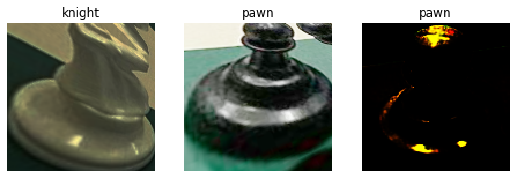

In [12]:
train_dl.show_batch(max_n=3)

In [13]:
train_dl.vocab

(#6) ['bishop','king','knight','pawn','queen','rook']

In [14]:
learn = cnn_learner(train_dl, resnet50, metrics=accuracy)

##### phase1

In [15]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.988652,0.263435,0.898955,00:18
1,1.165623,0.067479,0.986063,00:10
2,0.764247,0.059440,0.987805,00:09
3,0.543687,0.033622,0.994774,00:10
4,0.419470,0.024006,0.996516,00:09
5,0.354553,0.022820,0.996516,00:09
6,0.305277,0.027815,0.994774,00:10
7,0.248451,0.023277,0.998258,00:10
8,0.203442,0.026544,0.996516,00:09
9,0.204993,0.028975,0.996516,00:09


In [16]:
from modules.trainutils import my_test_metrics

In [18]:
my_test_metrics(learn, test_path_easy)

(0.8519775175753935, 0.7530864197530864)

              precision    recall  f1-score   support

      bishop       0.61      0.85      0.71        26
        king       0.65      0.60      0.63        25
      knight       0.90      0.96      0.93        27
        pawn       0.72      1.00      0.84        31
       queen       1.00      0.33      0.50        27
        rook       0.86      0.73      0.79        26

    accuracy                           0.75       162
   macro avg       0.79      0.75      0.73       162
weighted avg       0.79      0.75      0.74       162



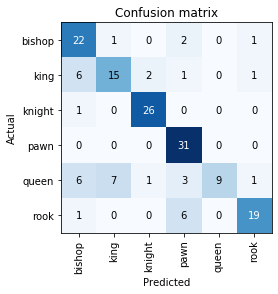

In [19]:
easy_test_dl = learn.dls.test_dl(get_image_files(test_path_easy), 
                                 with_labels=True)

interp = ClassificationInterpretation.from_learner(learn, 
                                                  dl = easy_test_dl)

interp.print_classification_report()

interp.plot_confusion_matrix()

##### phase2

In [20]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.269934,0.042450,0.994774,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.280417,0.026043,0.998258,00:12
1,0.229905,0.022851,0.998258,00:12
2,0.227334,0.025997,0.994774,00:12
3,0.217394,0.047701,0.994774,00:12
4,0.186650,0.039860,0.998258,00:12
5,0.154546,0.025372,0.996516,00:12
6,0.143468,0.021645,0.998258,00:12
7,0.119534,0.024280,0.996516,00:12
8,0.109768,0.023968,0.996516,00:12
9,0.099982,0.022713,0.998258,00:12


In [21]:
my_test_metrics(learn, test_path_easy)

(0.30515063324092345, 0.8765432098765432)

              precision    recall  f1-score   support

      bishop       0.83      0.92      0.87        26
        king       0.83      0.80      0.82        25
      knight       0.87      1.00      0.93        27
        pawn       0.86      1.00      0.93        31
       queen       0.94      0.56      0.70        27
        rook       0.96      0.96      0.96        26

    accuracy                           0.88       162
   macro avg       0.88      0.87      0.87       162
weighted avg       0.88      0.88      0.87       162



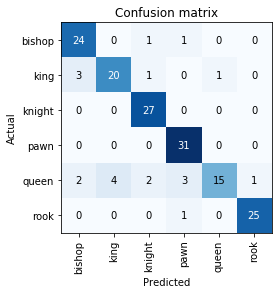

In [22]:
easy_test_dl = learn.dls.test_dl(get_image_files(test_path_easy), 
                                 with_labels=True)

interp = ClassificationInterpretation.from_learner(learn, 
                                                  dl = easy_test_dl)

interp.print_classification_report()

interp.plot_confusion_matrix()

##### phase 3

In [23]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.132790,0.027071,0.998258,00:10


epoch,train_loss,valid_loss,accuracy,time
0,0.101947,0.022821,0.998258,00:12
1,0.100889,0.021673,0.998258,00:12
2,0.114306,0.031756,0.996516,00:12
3,0.127421,0.017291,0.998258,00:12
4,0.128681,0.021984,0.996516,00:12
5,0.115374,0.034920,0.993031,00:12
6,0.112305,0.024489,0.998258,00:12
7,0.096489,0.020130,0.998258,00:12
8,0.085149,0.021915,0.998258,00:12
9,0.075521,0.020564,0.998258,00:12


In [24]:
my_test_metrics(learn, test_path_easy)

(0.33317304172633605, 0.8765432098765432)

              precision    recall  f1-score   support

      bishop       0.83      0.92      0.87        26
        king       0.95      0.76      0.84        25
      knight       0.84      1.00      0.92        27
        pawn       0.91      1.00      0.95        31
       queen       0.94      0.56      0.70        27
        rook       0.84      1.00      0.91        26

    accuracy                           0.88       162
   macro avg       0.88      0.87      0.87       162
weighted avg       0.89      0.88      0.87       162



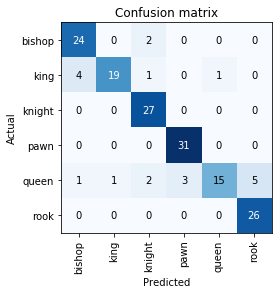

In [25]:
easy_test_dl = learn.dls.test_dl(get_image_files(test_path_easy), 
                                 with_labels=True)

interp = ClassificationInterpretation.from_learner(learn, 
                                                  dl = easy_test_dl)

interp.print_classification_report()

interp.plot_confusion_matrix()

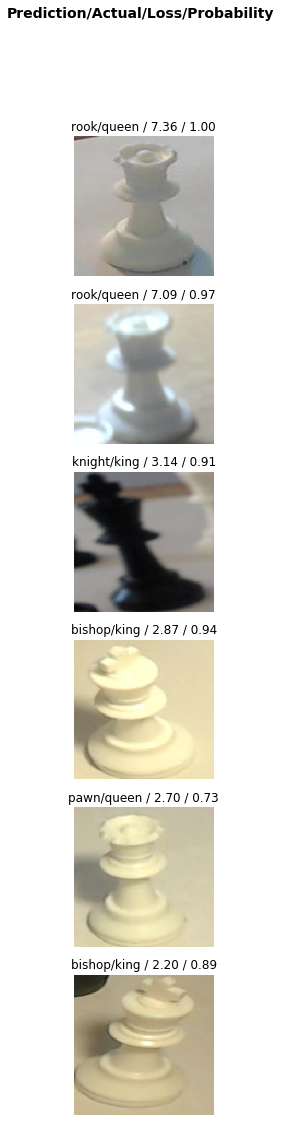

In [27]:
interp.plot_top_losses(6, nrows=6)

### Scrap work

In [101]:
x,y = train_dl.valid.one_batch()

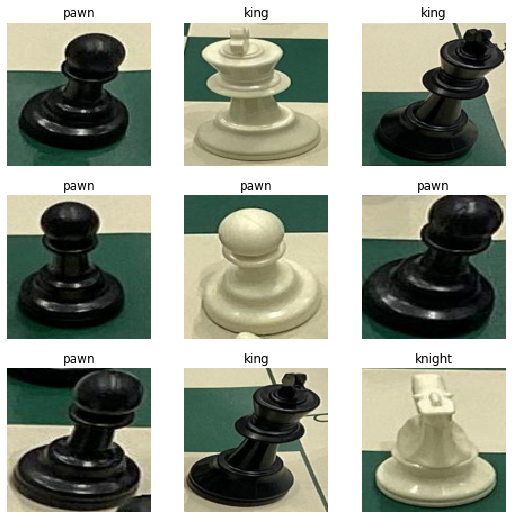

In [103]:
train_dl.show_batch(b=(x,y))

In [113]:
decoded = train_dl._decode_batch((x,y))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


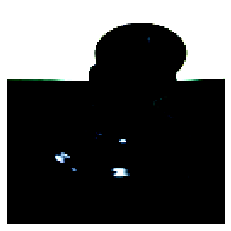

In [115]:
show_image(decoded[0][0])

In [86]:
queen_inds = [i for i, _y in enumerate(y) 
              if train_dl.vocab[_y] == 'queen']
queen_inds

[10, 19, 24, 29, 43, 44, 48]

In [87]:
queens = x[queen_inds,:]
queens.shape

torch.Size([7, 3, 128, 128])

In [88]:
train_dl.valid.after_batch

Pipeline: IntToFloatTensor -> AffineCoordTfm -> LightingTfm -> Normalize

In [91]:
train_dl.valid.after_item

Pipeline: MyResizeDeterm -> ToTensor

In [95]:
ltfm = train_dl.valid.after_batch[2]

In [99]:
br_ltfm = ltfm.fs[0]

In [100]:
br_ltfm.max_lighting

0.9

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


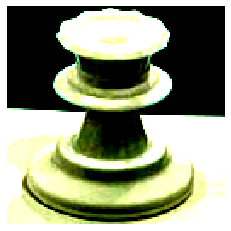

In [92]:
show_image(queens[4])

In [77]:
# show_image_batch((queens, queen_inds))